# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
#머신러닝 모델 구축 / 평가
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error 


# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [94]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 14)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB


### Data Preprocessing

#### 결측치 제거

In [95]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Mileage, Engine, Power, Seats는 최빈값으로 결측치 대체  
New_Price는 열 제거

In [96]:
data = data.drop(columns=['New_Price'])

In [97]:
data.fillna({'Seats':data['Seats'].mode()[0], 'Mileage':data['Mileage'].mode()[0], 'Engine':data['Engine'].mode()[0], 'Power':data['Power'].mode()[0]}, inplace=True)
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### 범주형 변수들에 대해 dummy 변수 생성

In [98]:
df = data.copy()
df = df.drop('Name', axis=1)   # Name 변수는 제거
df = pd.get_dummies(df)
df

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,2010,72000,5.0,1.75,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,41000,5.0,12.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011,46000,5.0,4.50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012,87000,7.0,6.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013,40670,5.0,17.74,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,2014,27365,5.0,4.75,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,6015,2015,100000,5.0,4.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,6016,2012,55000,8.0,2.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,6017,2013,46000,5.0,2.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X = df.drop(columns=['Price'])
y = df[['Price']]

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2021)

# **선형회귀 모델 구축**
statsmodels의 OLS를 이용해 선형회귀분석 시행

#### 선형회귀 모델 가정 확인

In [101]:
X_train=sm.add_constant(X_train) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_train,X_train)
model_trained=model.fit()

#### 1. 확률 오차의 정규성 확인

실선(빨간색)을 잘 따르지 않고 선명한 곡선 형태를 보이므로 확률 오차의 정규성 가정을 잘 만족하지 않는 것으로 보임.

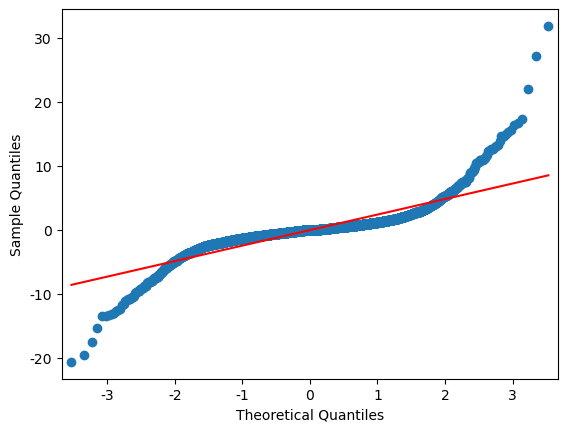

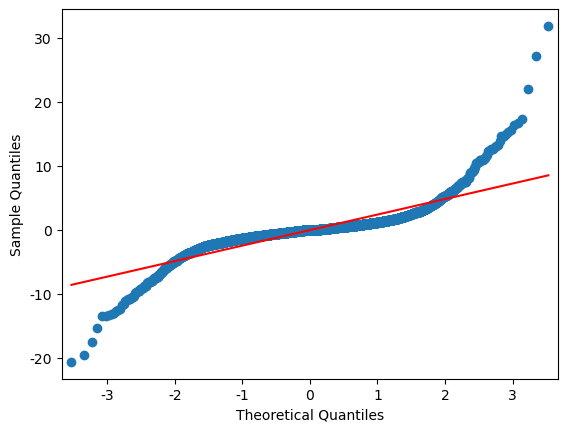

In [80]:
model_residuals=model_trained.resid

plt.rcParams["axes.unicode_minus"]=False
sm.ProbPlot(model_residuals).qqplot(line="s")

#### 2. 확률 오차의 등분산성 확인
적합값이 커짐에 따라 잔차의 변동의 폭이 커지고 있으므로 오차의 등분산성 가정을 잘 만족하지 않는 것으로 보임

Text(0, 0.5, 'residuals')

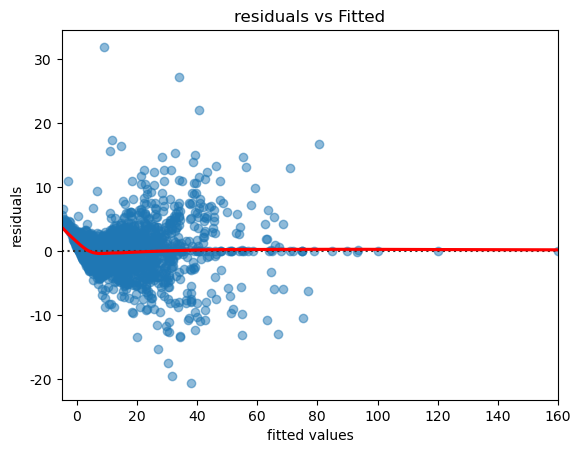

In [88]:
model_fitted_y=model_trained.fittedvalues

sns.residplot(x=model_fitted_y, y=model_residuals, lowess=True, scatter_kws={"alpha":0.5},line_kws={"color":"red"})

plt.title("residuals vs Fitted")
plt.xlabel("fitted values")
plt.ylabel("residuals")

In [112]:
print(model_trained.summary()) #통계량 제공됨

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:10:24   Log-Likelihood:                -11096.
No. Observations:                4815   AIC:                         2.379e+04
Df Residuals:                    4015   BIC:                         2.897e+04
Df Model:                         799                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [130]:
drop_columns = []
for idx in range(X_train.shape[1]):
    if model_trained.pvalues[idx] > 0.05:
        drop_columns.append(X_train.columns[idx])

- p-value가 0.05를 초과하는 설명변수 제거

In [131]:
model=sm.OLS(y_train, X_train.drop(columns=drop_columns))
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:19:30   Log-Likelihood:                -11724.
No. Observations:                4815   AIC:                         2.445e+04
Df Residuals:                    4313   BIC:                         2.770e+04
Df Model:                         501                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

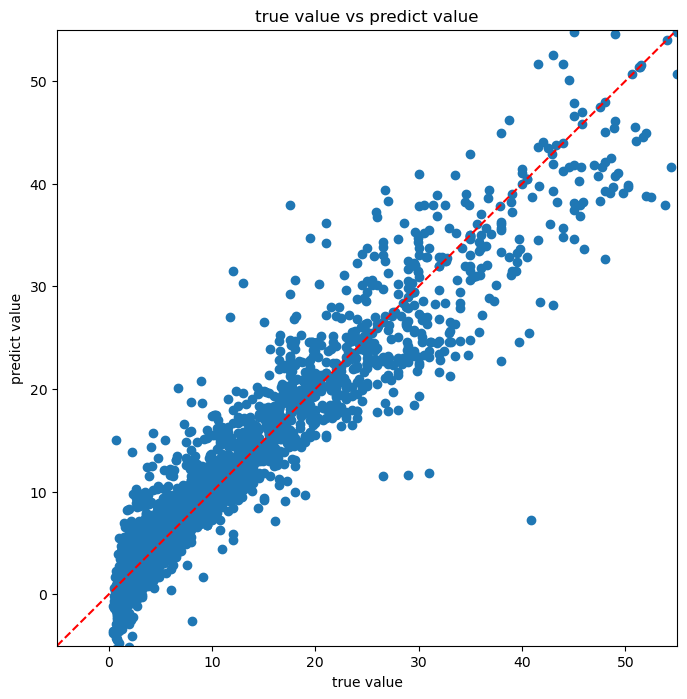

In [132]:
#train하는 부분
y_train_pred=model_trained.fittedvalues

plt.figure(figsize=(8,8))
plt.title("true value vs predict value")
plt.scatter(y_train,y_train_pred)
plt.plot([-5,55],[-5,55],ls="--",c="red")
plt.xlabel("true value")
plt.ylabel("predict value")
plt.xlim(-5,55)
plt.ylim(-5,55)
plt.show()

#일직선을 따르면 어느정도 정확한 예측을 함

In [134]:
X_test=sm.add_constant(X_test)
y_test_pred=model_trained.predict(X_test.drop(columns=drop_columns))
y_test_pred.head()

901      6.834654
2730     5.627475
1264    20.363004
5416    65.373787
3551    -4.241095
dtype: float64

### 결과

In [137]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [138]:
print("Training MSE : {:.3f}".format(mean_squared_error(y_train,y_train_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_train,y_train_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(y_train,y_train_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(y_train,y_train_pred)))
print("Training R2 : {:.3f}".format(r2_score(y_train,y_train_pred)))

Training MSE : 7.629
Training RMSE : 2.762
Training MAE : 1.619
Training MAPE : 169.589
Training R2 : 0.938


In [139]:
print("Testing MSE : {:.3f}".format(mean_squared_error(y_test,y_test_pred)))
print("Testing RMSE : {:.3f}".format(np.sqrt(mean_squared_error(y_test,y_test_pred))))
print("Testing MAE : {:.3f}".format(mean_absolute_error(y_test,y_test_pred)))
print("Testing MAPE : {:.3f}".format(mean_absolute_percentage_error(y_test,y_test_pred)))
print("Testing R2 : {:.3f}".format(r2_score(y_test,y_test_pred)))

Testing MSE : 24.753
Testing RMSE : 4.975
Testing MAE : 2.462
Testing MAPE : 181.237
Testing R2 : 0.815
